# 2 zajęcia: Obsługa danych i podstawy implementacji obliczeń

Korzystając z przygotowanych do laboratorium plików wczytuję dane do ramki pandas. Dane pobieram z anglojęzycznej wikipedii. Plik zawiera statystyki rzek Białorusi. Podana jest nazwa i długość, w tym długość w kraju. Tabela z danymi jest przedstawiona poniżej.

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

URL = "https://en.wikipedia.org/wiki/List_of_rivers_of_Belarus"
resp = requests.get(URL) 
if resp.status_code == 200:
    soup = BeautifulSoup(resp.content,'html.parser')
    tab = soup.find('table',{'class':"wikitable"})
df = pd.read_html(str(tab))[0]
df

,Name,"Total, km","In Belarus, km"
0,Dnieper River,2145,690
1,Western Dvina,1020,328
2,Neman River,937,459
3,Bug River,831,169
4,Pripyat River,761,495
5,Sozh River,648,493
6,Berezina River,613,613
7,Vilija,510,276
8,Ptsich,421,421
9,Shchara,325,325


Teraz przedstawmy te dane na wykresie z pomocą następującego kodu. Ponadto dodajmy tytuł wykresu, nazwijmy odpowiednio osie oraz obróćmy nazwy żeby wszystkie się zmieściły i były czytelne. Oś x zawiera nazwy rzek, natomiast na osi y umieściłem stosunek długości rzeki w kraju do jej długości całkowitej. Dane są w procentach

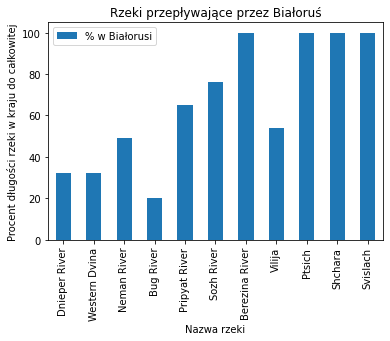

In [7]:
import matplotlib.pyplot as plt

df['% w Białorusi'] = df['In Belarus, km'] / df['Total, km'] * 100

riversPlot = df.plot(x='Name', y='% w Białorusi', kind='bar', title='Rzeki przepływające przez Białoruś')
plt.xticks(rotation=90)
riversPlot.set_xlabel('Nazwa rzeki')
riversPlot.set_ylabel('Procent długości rzeki w kraju do całkowitej')
plt.show()


Spróbujmy urozmaicić nasz wykres. Sprawdźmy które rzeki ponad w połowie przepływają przez kraj. W tym celu dodajmy na wykres czerwoną linię obrazującą 50%.

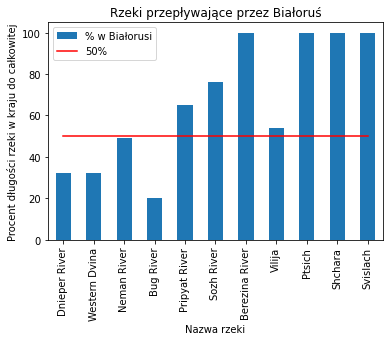

In [23]:
line50 = []
dataSize = df['% w Białorusi'].size
PERCENT50 = 50

for i in range(0, dataSize):
    line50.append(PERCENT50)
    lineAvr.append(avr)

ax = df.plot(x = "Name", y = "% w Białorusi", kind = "bar", title = "Rzeki przepływające przez Białoruś")
ax.set_xlabel('Nazwa rzeki')
ax.set_ylabel('Procent długości rzeki w kraju do całkowitej')

bx = pd.DataFrame(line50, columns = ['50%'])
bx.plot(ax=ax, color='#FF0000')
plt.xticks(ax.get_xticks(), rotation = 90)
plt.show()